# Optimizing Car Market Value Predictions for Rusty Bargain

Rusty Bargain, a used car buying and selling company, is developing an innovative application that allows users to quickly determine the market value of their cars. By leveraging historical data, vehicle technical specifications, model variations, and pricing details, this project aims to build a robust machine learning model to power this feature. The company prioritizes prediction accuracy, speed, and training efficiency in the model development process.

As part of this initiative, my role involves preparing and analyzing the data to ensure its suitability for modeling. I will train and evaluate multiple machine learning models, including gradient boosting, random forest, decision tree, and linear regression, while performing hyperparameter tuning to optimize their performance. Linear regression will also be used as a baseline check to validate the performance of more complex models.

The models will be assessed for their prediction quality, speed, and training efficiency, with RMSE as the primary evaluation metric. Through this process, the goal is to develop a reliable and efficient car price prediction system that balances accuracy and computational performance, enhancing Rusty Bargain’s application and attracting new buyers.

## Import Library and Data

### Import Library

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import matplotlib.cm as cm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

### Import Data

In [ ]:
try:
    # Try loading the file from your laptop path
    data = pd.read_csv("C:/Users/Eugene/Documents/GitHub/TripleTen-Projects/12. Rusty Bargain's Car Market Value Prediction/car_data.csv")
except FileNotFoundError:
    # If the file is not found, try loading from the PC path
    data = pd.read_csv("C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/12. Rusty Bargain's Car Market Value Prediction/car_data.csv")

In [2]:
data = pd.read_csv('/datasets/car_data.csv')

### General Data Information

In [3]:
data.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
data.sample(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
307061,23/03/2016 15:55,500,NaN,2016,manual,75,polo,150000,0,NaN,volkswagen,NaN,23/03/2016 00:00,0,63667,05/04/2016 19:17
181853,05/03/2016 18:25,14200,sedan,2012,manual,170,other,90000,2,gasoline,alfa_romeo,yes,05/03/2016 00:00,0,60529,06/04/2016 02:45
51544,19/03/2016 13:51,700,NaN,2016,manual,0,NaN,150000,0,petrol,volkswagen,NaN,19/03/2016 00:00,0,9599,28/03/2016 15:45
113484,16/03/2016 23:37,350,wagon,1998,manual,129,passat,150000,9,petrol,volkswagen,no,16/03/2016 00:00,0,22926,26/03/2016 14:15
61005,09/03/2016 14:36,2000,wagon,1996,manual,150,NaN,150000,2,NaN,bmw,no,09/03/2016 00:00,0,96317,10/03/2016 11:17
32617,27/03/2016 21:47,13800,sedan,2011,manual,122,golf,60000,11,petrol,volkswagen,no,27/03/2016 00:00,0,79777,03/04/2016 20:17
60445,22/03/2016 20:57,2200,sedan,1999,manual,105,3er,150000,4,petrol,bmw,no,22/03/2016 00:00,0,66509,24/03/2016 05:47
270797,22/03/2016 12:49,14500,suv,2011,manual,141,qashqai,80000,3,petrol,nissan,no,22/03/2016 00:00,0,41372,06/04/2016 01:44
241108,20/03/2016 23:06,12200,coupe,2008,manual,200,tt,150000,5,petrol,audi,no,20/03/2016 00:00,0,65812,26/03/2016 17:46
251941,23/03/2016 00:58,1499,wagon,2001,manual,101,vectra,150000,9,petrol,opel,no,22/03/2016 00:00,0,97209,23/03/2016 08:39


In [6]:
data.isnull().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [7]:
data.duplicated().sum()

262

Within the dataset, the are several valuable information about the historical vehicle information that can be used for the prediction. However, there are some problem within the data such as the missing value and also the duplicated data which required to be handled or processed before it is used for the predicting phase.

## Data Preprocessing

### Column Rename

In [8]:
def rename_lowercase_underscore(column_name):
    words = ''.join(['_' + c.lower() if c.isupper() else c for c in column_name]).lstrip('_')
    return words

In [9]:
data.rename(columns=lambda x: rename_lowercase_underscore(x), inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        354369 non-null  object
 1   price               354369 non-null  int64 
 2   vehicle_type        316879 non-null  object
 3   registration_year   354369 non-null  int64 
 4   gearbox             334536 non-null  object
 5   power               354369 non-null  int64 
 6   model               334664 non-null  object
 7   mileage             354369 non-null  int64 
 8   registration_month  354369 non-null  int64 
 9   fuel_type           321474 non-null  object
 10  brand               354369 non-null  object
 11  not_repaired        283215 non-null  object
 12  date_created        354369 non-null  object
 13  number_of_pictures  354369 non-null  int64 
 14  postal_code         354369 non-null  int64 
 15  last_seen           354369 non-null  object
dtypes:

### Data Type Transformation

In [11]:
date_columns = ['date_crawled', 'date_created', 'last_seen']
for i in date_columns:
    data[i] = pd.to_datetime(data[i], format='%d/%m/%Y %H:%M')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354369 non-null  datetime64[ns]
 1   price               354369 non-null  int64         
 2   vehicle_type        316879 non-null  object        
 3   registration_year   354369 non-null  int64         
 4   gearbox             334536 non-null  object        
 5   power               354369 non-null  int64         
 6   model               334664 non-null  object        
 7   mileage             354369 non-null  int64         
 8   registration_month  354369 non-null  int64         
 9   fuel_type           321474 non-null  object        
 10  brand               354369 non-null  object        
 11  not_repaired        283215 non-null  object        
 12  date_created        354369 non-null  datetime64[ns]
 13  number_of_pictures  354369 no

### Missing value

In [13]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("Missing Value Percentage:")
print(missing_percentage)

Missing Value Percentage:
date_crawled           0.000000
price                  0.000000
vehicle_type          10.579368
registration_year      0.000000
gearbox                5.596709
power                  0.000000
model                  5.560588
mileage                0.000000
registration_month     0.000000
fuel_type              9.282697
brand                  0.000000
not_repaired          20.079070
date_created           0.000000
number_of_pictures     0.000000
postal_code            0.000000
last_seen              0.000000
dtype: float64


Since the missing value is exist only on the categorical column and the amount is significant, the missing value unable to be droped. Hence to counter this, the missing value will be replaced with value 'unknown'.

In [14]:
categorical_column = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'not_repaired']
for i in categorical_column:
    data[i] = data[i].fillna('unknown')

### Duplicated Data

In [15]:
data = data.drop_duplicates()

In [16]:
data.duplicated().sum()

0

### Handle Outlier

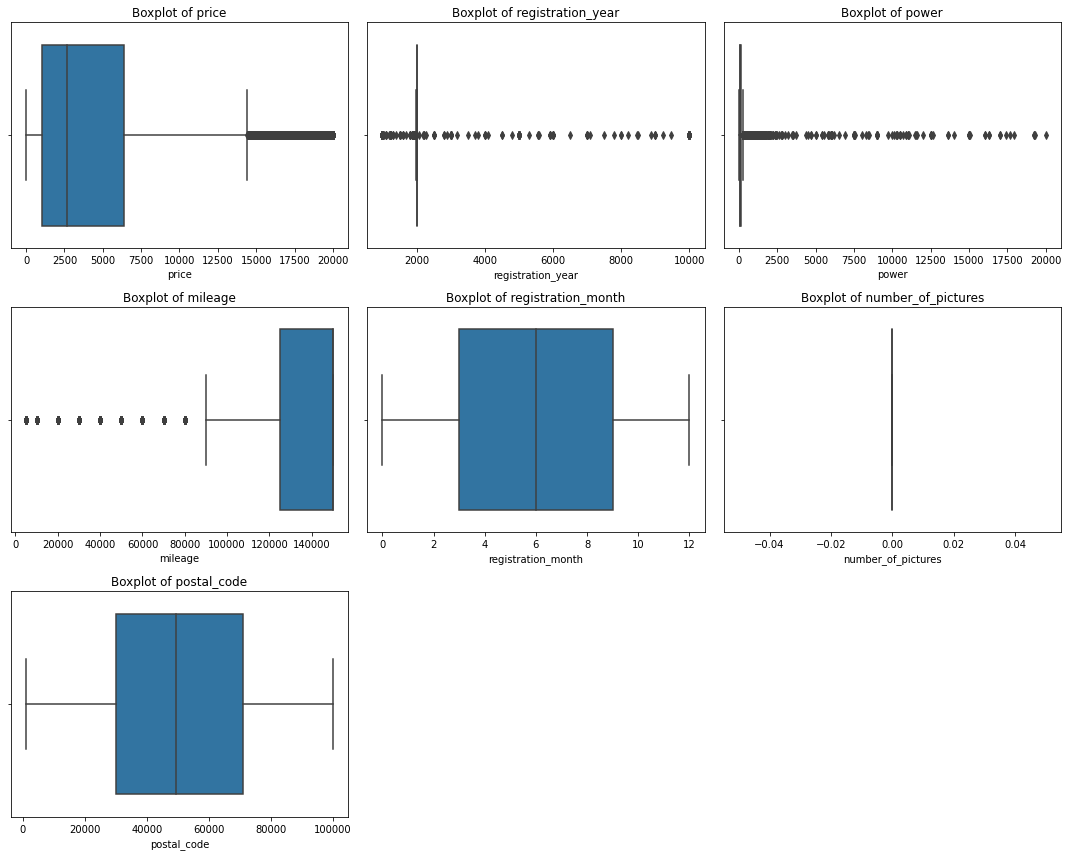

In [17]:
columns_to_check = ['price', 'registration_year', 'power', 'mileage', 'registration_month', 'number_of_pictures', 'postal_code']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

axes = axes.flatten()

for i, column in enumerate(columns_to_check):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

for i in range(len(columns_to_check), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

In [18]:
def detect_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data < lower_bound) | (data > upper_bound)]

In [19]:
for column in columns_to_check:
    column_data = data[column]
    
    # calculate summary statistics
    column_mean = column_data.mean()
    column_median = column_data.median()
    column_std = column_data.std()
    column_q1 = column_data.quantile(0.25)
    column_q3 = column_data.quantile(0.75)
    
    # calculate IQR
    iqr = column_q3 - column_q1
    
    # calculate lower and upper bounds for outliers
    lower_bound = column_q1 - 1.5 * iqr
    upper_bound = column_q3 + 1.5 * iqr
    
    # find outliers
    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    
    # print statistics and outliers
    print(f"Statistics for {column}:")
    print(f"Mean: {column_mean}")
    print(f"Median: {column_median}")
    print(f"Standard Deviation: {column_std}")
    print(f"Q1: {column_q1}")
    print(f"Q3: {column_q3}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of outliers: {len(outliers)}")
    print()

Statistics for price:
Mean: 4416.433287113782
Median: 2700.0
Standard Deviation: 4514.338583843513
Q1: 1050.0
Q3: 6400.0
IQR: 5350.0
Lower Bound: -6975.0
Upper Bound: 14425.0
Number of outliers: 18967

Statistics for registration_year:
Mean: 2004.2353554151712
Median: 2003.0
Standard Deviation: 90.26116839234697
Q1: 1999.0
Q3: 2008.0
IQR: 9.0
Lower Bound: 1985.5
Upper Bound: 2021.5
Number of outliers: 6305

Statistics for power:
Mean: 110.0896508682404
Median: 105.0
Standard Deviation: 189.9149723518935
Q1: 69.0
Q3: 143.0
IQR: 74.0
Lower Bound: -42.0
Upper Bound: 254.0
Number of outliers: 7335

Statistics for mileage:
Mean: 128211.811684039
Median: 150000.0
Standard Deviation: 37906.59010061005
Q1: 125000.0
Q3: 150000.0
IQR: 25000.0
Lower Bound: 87500.0
Upper Bound: 187500.0
Number of outliers: 53217

Statistics for registration_month:
Mean: 5.714182436382224
Median: 6.0
Standard Deviation: 3.7266820263143883
Q1: 3.0
Q3: 9.0
IQR: 6.0
Lower Bound: -6.0
Upper Bound: 18.0
Number of outlie

In [20]:
columns_with_outliers = ['price', 'registration_year', 'power', 'mileage']

for column in columns_with_outliers:
    
    # calculate summary statistics
    column_mean = data[column].mean()
    column_median = data[column].median()
    column_std = data[column].std()
    column_q1 = data[column].quantile(0.25)
    column_q3 = data[column].quantile(0.75)
    
    # calculate IQR
    iqr = column_q3 - column_q1
    
    # calculate lower and upper bounds for outliers
    lower_bound = column_q1 - 1.5 * iqr
    upper_bound = column_q3 + 1.5 * iqr
    
    # replace outliers with median or winsorize
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), column_median, data[column])


### Handle Inconsistent Data

In [21]:
data = data[data['price'] > 1000]

data=data[data['registration_month']!=0]

data=data[(data['power'] >= 60) & (data['power'] <= 2000)]


In [22]:
data['registration_year'] = data['registration_year'].astype(int)

### Data Manipulation

In [23]:
data['age'] = 2024 - data['registration_year']

In [24]:
data['mileage_per_year'] = data['mileage'] / data['age']

### Drop Unnecessary  Columns

In [25]:
data.drop(['date_crawled', 'date_created', 'number_of_pictures', 'postal_code', 'last_seen', 'registration_year', 'mileage'], axis=1, inplace=True)

### Preprocessed Data Check

In [26]:
data.sample(10)

,price,vehicle_type,gearbox,power,model,registration_month,fuel_type,brand,not_repaired,age,mileage_per_year
39703,6550.0,wagon,manual,125.0,astra,11,petrol,opel,no,20,5000.000000
202458,2700.0,sedan,auto,110.0,golf,10,petrol,volkswagen,no,10,15000.000000
53615,10600.0,wagon,manual,125.0,a3,7,petrol,audi,no,15,10000.000000
300153,2700.0,wagon,manual,143.0,a4,8,gasoline,audi,no,16,7812.500000
58880,6290.0,sedan,auto,150.0,c_klasse,7,gasoline,mercedes_benz,no,19,7894.736842
96319,8500.0,sedan,manual,110.0,golf,11,gasoline,volkswagen,no,16,9375.000000
200808,3290.0,small,manual,75.0,ibiza,7,petrol,seat,no,19,6578.947368
96551,6200.0,small,manual,101.0,yaris,11,petrol,toyota,no,15,6000.000000
96327,4450.0,small,manual,60.0,c3,2,petrol,citroen,no,17,5882.352941
293455,2700.0,wagon,manual,120.0,a4,4,gasoline,audi,no,11,9090.909091


## Model Training

split data into features and target

In [27]:
x = data.drop('price', axis=1)
y = data['price']

split data into training and testing sets

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

define preprocessing steps for categorical features

In [29]:
categorical_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

combine preprocessing steps

In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

define models

In [31]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor()
}

In [32]:
trained_models = {}
for name, model in models.items():
    # create a pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    # train the model
    start_time = time.time()
    pipeline.fit(x_train, y_train)
    training_time = time.time() - start_time
    
    # store trained model and training time
    trained_models[name] = pipeline
    trained_models[name].named_steps['model'].training_time_ = training_time

## Model Analysis

In [33]:
mae_scores = {}
mse_scores = {}
r2_scores = {}
training_times = {}

In [34]:
for name, model in trained_models.items():
    # make predictions
    y_pred = model.predict(x_test)

    # evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mae_scores[name] = mae
    mse_scores[name] = mse
    r2_scores[name] = r2
    
    # assign the training time
    training_times[name] = model.named_steps['model'].training_time_

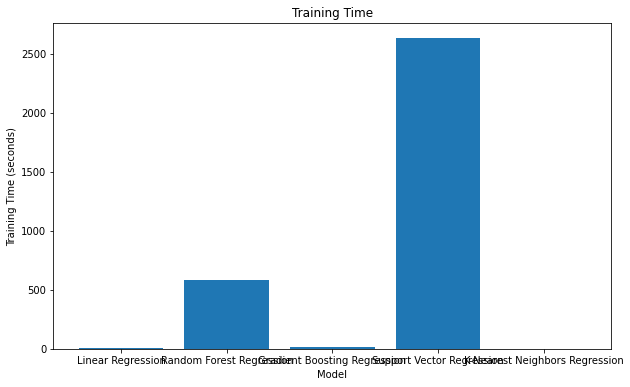

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(training_times.keys(), training_times.values())
plt.title('Training Time')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.show()

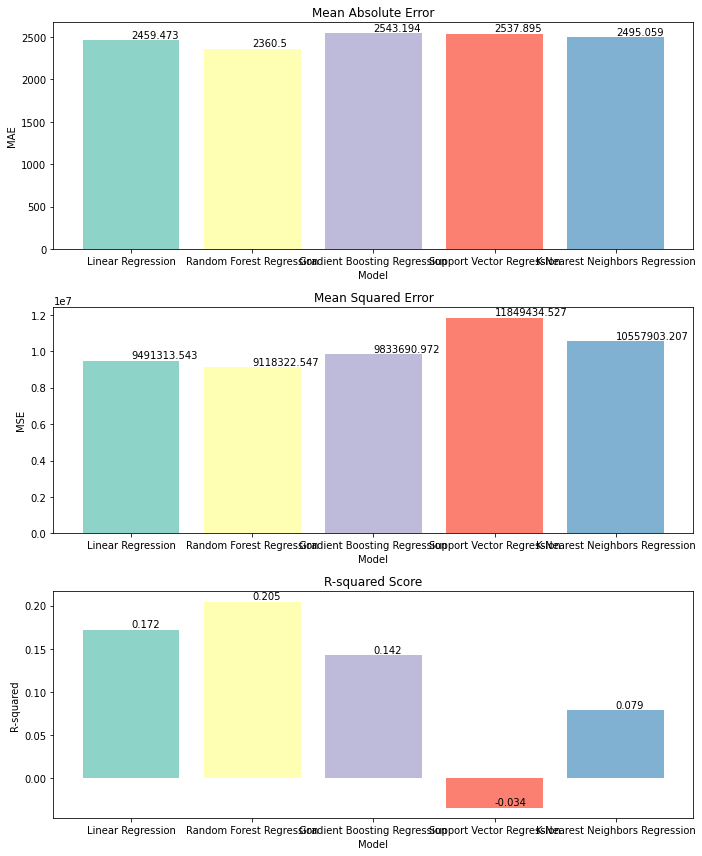

In [36]:
colors = cm.Set3.colors

plt.figure(figsize=(10, 12))

plt.subplot(3, 1, 1)
bars = plt.bar(mae_scores.keys(), mae_scores.values(), color=colors)
plt.title('Mean Absolute Error')
plt.xlabel('Model')
plt.ylabel('MAE')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom')

plt.subplot(3, 1, 2)
bars = plt.bar(mse_scores.keys(), mse_scores.values(), color=colors)
plt.title('Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('MSE')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom')

plt.subplot(3, 1, 3)
bars = plt.bar(r2_scores.keys(), r2_scores.values(), color=colors)
plt.title('R-squared Score')
plt.xlabel('Model')
plt.ylabel('R-squared')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom')


plt.tight_layout()
plt.show()

In [37]:
comparison_table = pd.DataFrame({'Model': list(mae_scores.keys()),
                                 'Mean Absolute Error': list(mae_scores.values()),
                                 'Mean Squared Error': list(mse_scores.values()),
                                 'R-squared Score': list(r2_scores.values()),
                                 'Training Time (seconds)': list(training_times.values())})


In [38]:
print("Model Comparison Table:")
comparison_table

Model Comparison Table:


,Model,Mean Absolute Error,Mean Squared Error,R-squared Score,Training Time (seconds)
0,Linear Regression,2459.473106,9.491314e+06,0.172120,6.779315
1,Random Forest Regression,2360.500395,9.118323e+06,0.204654,581.789183
2,Gradient Boosting Regression,2543.194309,9.833691e+06,0.142256,11.908593
3,Support Vector Regression,2537.895370,1.184943e+07,-0.033567,2630.312344
4,K-Nearest Neighbors Regression,2495.058984,1.055790e+07,0.079087,0.352846


The evaluation reveals significant differences among the models in performance and computational efficiency by using MAE and MSE, R-squared Score and also the Training Time. The results:
- Linear Regression has relatively low training time but higher MAE, MSE, and lower R-squared compared to other models.
- Random Forest Regression has low MAE and MSE, and higher R-squared, but it takes longer to train.
- Gradient Boosting Regression has relatively low MAE and MSE, but lower R-squared compared to Random Forest, and it's faster to train.
- Support Vector Regression (SVR) has the highest MAE and MSE, negative R-squared indicating poor fit, and it takes a significantly longer time to train.
- K-Nearest Neighbors Regression (KNN) has moderate MAE and MSE, low R-squared, and very low training time.

Considering these factors, Random Forest Regression seems to be the best-performing model overall due to its lower MAE and MSE, higher R-squared, and acceptable training time. However, if computational resources are limited or training time is a critical factor, K-Nearest Neighbors Regression might be a better choice despite its slightly inferior performance in terms of MAE, MSE, and R-squared.

# Checklist

Type 'x' to mark it as complete. Then, press Shift+Enter keys

- [x]  Jupyter Notebook can be open
- [x]  There is no issue on the code
- [x]  Download the data and prepared the data for the analysis
- [x]  Model already trained
- [x]  Perform analysis towards the model's speed and quality result